<div style="text-align:center">
<img src="img/intro_correspondre.png">
</div>


*** CREATION IN PROGRESS ***<br>
Notebook created by GITHUB ESTELLE DERRIEN

## Summary

27. <b> Modeling of a shortest path problem  </b>
    - Abstract
    - Instance : Basical case
    - NetworkX Djikstra Solution
    - SHortest Path Python Pulp Solution
    - Instance : Find shortest path from Chicago to Dallas
    - Naïve wrong try out example with python pulp
    - Hard coded Python Pulp solution
    - Mathematical model
    - Compact Python Pulp solution
28. <b> Modeling of a production allocation problem  </b>
    - Abstract
    - Instance : Mumbaï university - 3 products company
    - Math model
    - Python Pulp solution (Hard coded)
    - Python Pulp solution (Compact model)
29. <b> Modeling of an oil refinery problem</b>
    - Abstract
    - Instance : ApMonitor example
    - Math model
    - Python Pulp solution (Hard coded)
    - Python Pulp solution (Compact model)

29. <b> Modeling of a cutting stock problem  </b>
    - Abstract
    - Instance
30. <b> Modeling of a parrallels machine problem  </b>
    - Abstract
    - Instance
31. <b> Modeling of a job shop problem  </b>
    - Abstract
    - Instance
32. <b> Modeling of a chemistry combinatorial optimization  </b>
    - Abstract of the Mac Graw Book problem BOILER/TURBO-GENERATOR SYSTEM
    - Mathematical modeling
    - Python Pulp or Cplex solution
33. <b> Modeling a petroleum combinatorial optimization </b>
    - Abstract and Kirchhoff constraints
    - Mathematical modeling
    - Python Pulp or Cplex solution
34. <b> Modeling of a multiple objectives problem</b>
    - Abstract of https://www.supplychaindataanalytics.com/multi-objective-linear-optimization-with-pulp-in-python/
    - Mathematical modeling
    - Python Pulp or Cplex solution
35. <b> Getting familiar with sensitivity analysis</b>
    - Displaying Reduced costs
    - Displaying The Shadow Price
    - Displaying Slacks variables
36. <b> Getting familiar with variables relaxations</b>
37. <b> Getting familiar with table generation</b>

38. <b> Linearizations </b>
    - Linearization technics using the AIMMS modeling guide and Ling-Chieh Kung technics
    - Objective linearizations
    - Constraints linearizations
    - Examples using Python solvers


38. <b> Apendix </b> 
- Importing a data instance from an Excel file
- Importing a data instance from a Database

# <b>27.  Modeling a shortest path problem  </b>

<div style="text-align:center">
<img src="img/highway.webp" width="500"/>
</div>

## <b>27.1 Abstract </b>

The shortest path problem is the problem of finding a path between two vertices (or nodes) in a graph such that the sum of the weights of its constituent edges is minimized.

## <b>27.2 Instance : Basical case</b>

<div style="text-align:center">
<img src="img/sp.png" width="500"/>
</div>

<b> What is the shortest path from node A to node F ?</b><br><br>
Link : https://transport-systems.imperial.ac.uk/tf/60008_21/n3_6_shortest_paths_pulp.html

## <b>27.4 NetworkX Djikstra Solution </b>


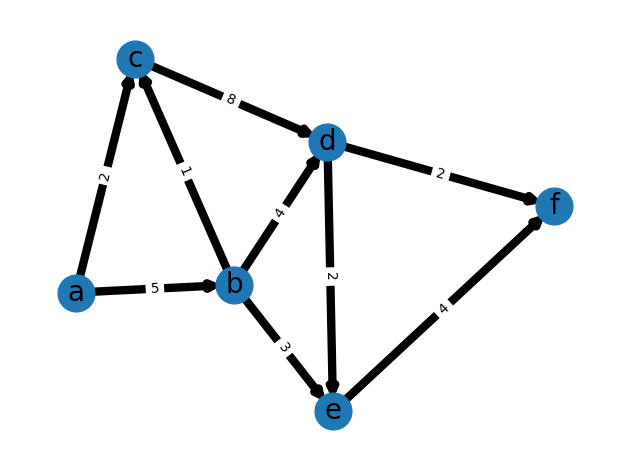

In [65]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()

G.add_edge("a", "b", weight=5,pos=(1,1))
G.add_edge("a", "c", weight=2)
G.add_edge("b", "c", weight=1,pos=(1,2))
G.add_edge("b", "d", weight=4)
G.add_edge("b", "e", weight=3)
G.add_edge("c", "d", weight=8)
G.add_edge("d", "e", weight=2)
G.add_edge("d", "f", weight=2)
G.add_edge("e", "f", weight=4)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=2)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [66]:
print("Path to follow")
nx.dijkstra_path(G, "a", "f")

Path to follow


['a', 'b', 'd', 'f']

In [67]:
print("Minimal Distance")
nx.dijkstra_path_length(G, "a", "f")

Minimal Distance


11

## <b>27.5 Python Pulp compact solution </b>

Testing the https://transport-systems.imperial.ac.uk/tf/60008_21/n3_6_shortest_paths_pulp.html LP code, this LP Pulp code provides the same solution than Djikstra :

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [68]:
# -----------------------------------
# Import lib
# -----------------------------------
from pulp import *

# -----------------------------------
# Instance
# -----------------------------------

N = ['A', 'B', 'C', 'D', 'E', 'F']

C = {'A': {'B': 5, 'C': 2}, 
     'B': {'C': 1, 'D': 4, 'E': 3}, 
     'C': {'D': 8}, 
     'D': {'E': 2, 'F': 2}, 
     'E': {'F': 4}}

# -----------------------------------
# All of the links from i to j possibilities
# -----------------------------------
# Meaning : node value is 1 if it's the first node, and -1 if F (last node)
D = {node: 1 if node == 'A' else -1 if node == 'F' else 0 for node in N}

# As soon as an xij variable is involved in the math model, 
# this coding strategy is used to model all of the possibilities.
# then, all of the possibilities becomes decisions variables, under the "decisions variables " part
E = [(i,j) for i in N for j in N if i in C.keys() if j in C[i].keys()]

# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem('prob', LpMinimize)

# -----------------------------------
# Decisions variables
# -----------------------------------
x = LpVariable.dicts('x', E,  lowBound = 0, upBound = 1, cat = LpInteger)

# -----------------------------------
# Math model 
# -----------------------------------

# objective
prob += lpSum([C[i][j]*x[i,j] for (i,j) in E])

# constraints
for i in N:
    prob += (lpSum([x[i,j] for j in N if (i,j) in E]) - lpSum([x[k,i] for k in N if (k,i) in E])) == D[i]

# -----------------------------------
# Solution
# -----------------------------------

status = prob.solve()

print(f'STATUS\n{LpStatus[status]}\n')

print('SOLUTION')
for v in prob.variables():
    if v.varValue >= 1:
        print(v.name, '=', v.varValue)

print("Minimized path = ", value(prob.objective))

STATUS
Optimal

SOLUTION
x_('A',_'B') = 1.0
x_('B',_'D') = 1.0
x_('D',_'F') = 1.0
Minimized path =  11.0


## <b> 27.6 Instance : Find shortest path from Chicago to Dallas</b>

Let's observe and recreate this hard coded version in Pulp , for a better understanding :

Link:
https://www.youtube.com/watch?v=7uCx--vUiiI

<div style="text-align:center">
<img src="img/sp2.png" >
</div>
Find the shortest path between Chicago and node 6 (Dallas), values are fictive.


<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

Let's start with a naïve try , picking all of the shortest nodes routes

In [69]:
# -----------------------------------
# Import lib
# -----------------------------------
from pulp import *


# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem('prob', LpMinimize)

# -----------------------------------
# Decisions variables
# -----------------------------------
# Recreating all xij roads possibilities, it's supra boring by hand.
# simply look at the graph to recreate the decisions variables.

# Node 1
X12 = pulp.LpVariable('X12', lowBound=0, cat='Binary')
X13 = pulp.LpVariable('X13', lowBound=0, cat='Binary')
X14 = pulp.LpVariable('X14', lowBound=0, cat='Binary')

# Node 2
X23 = pulp.LpVariable('X23', lowBound=0, cat='Binary')
X25 = pulp.LpVariable('X25', lowBound=0, cat='Binary')

# Node 3
X32 = pulp.LpVariable('X32', lowBound=0, cat='Binary')
X34 = pulp.LpVariable('X34', lowBound=0, cat='Binary')
X35 = pulp.LpVariable('X35', lowBound=0, cat='Binary')
X36 = pulp.LpVariable('X36', lowBound=0, cat='Binary')

# Node 4
X43 = pulp.LpVariable('X43', lowBound=0, cat='Binary')
X47 = pulp.LpVariable('X47', lowBound=0, cat='Binary')

# Node 5
X52 = pulp.LpVariable('X52', lowBound=0, cat='Binary')
X53 = pulp.LpVariable('X53', lowBound=0, cat='Binary')
X56 = pulp.LpVariable('X56', lowBound=0, cat='Binary')
X57 = pulp.LpVariable('X57', lowBound=0, cat='Binary')

# Node 7
X74 = pulp.LpVariable('X74', lowBound=0, cat='Binary')
X75 = pulp.LpVariable('X75', lowBound=0, cat='Binary')
X76 = pulp.LpVariable('X76', lowBound=0, cat='Binary')

# -----------------------------------
# Math model 
# -----------------------------------

# Objective
# Find the shortest path = minimizing roads distances
prob += 35 * X12 + 30 * X13 + 20 * X14 + 20 * X23 + 12 * X25 + 8 * X32 + 9 * X34 + 10 * X35 + 20 * X36  + 9 * X43 + 15 * X47 + 12 * X52 + 10 * X53 + 5 * X56 + 20 * X57 + 15 * X74 + 20 * X75 + 5 * X76

# Constraints
# Only one road picked per node
prob += X12 + X13 + X14 == 1
prob += X23 + X25  == 1
prob += X32 + X34 + X35 + X36  == 1
prob += X43 + X47   == 1
prob += X52 + X53 + X56 + X57   == 1
prob += X74 + X75 + X76  == 1

# -----------------------------------
# Solution
# -----------------------------------

status = prob.solve()

print(f'STATUS\n{LpStatus[status]}\n')

print('SOLUTION')
for v in prob.variables():
    if v.varValue >= 1:
        print(v.name, '=', v.varValue)



STATUS
Optimal

SOLUTION
X14 = 1.0
X25 = 1.0
X32 = 1.0
X43 = 1.0
X56 = 1.0
X76 = 1.0


Ok, in this front code, some logic is missing, we obtain each of the shortest node paths but it make no sense for finding the shortest path .
Let see how the constraints coding differs in this next coding part, path solution is correct  :

In [70]:
# -----------------------------------
# Import lib
# -----------------------------------
from pulp import *


# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem('prob', LpMinimize)

# -----------------------------------
# Decisions variables
# -----------------------------------
# Recreating all xij roads possibilities, it's supra boring by hand.
# simply look at the graph to recreate the decisions variables.

# Node 1
X12 = pulp.LpVariable('X12', lowBound=0, cat='Binary')
X13 = pulp.LpVariable('X13', lowBound=0, cat='Binary')
X14 = pulp.LpVariable('X14', lowBound=0, cat='Binary')

# Node 2
X23 = pulp.LpVariable('X23', lowBound=0, cat='Binary')
X25 = pulp.LpVariable('X25', lowBound=0, cat='Binary')

# Node 3
X32 = pulp.LpVariable('X32', lowBound=0, cat='Binary')
X34 = pulp.LpVariable('X34', lowBound=0, cat='Binary')
X35 = pulp.LpVariable('X35', lowBound=0, cat='Binary')
X36 = pulp.LpVariable('X36', lowBound=0, cat='Binary')

# Node 4
X43 = pulp.LpVariable('X43', lowBound=0, cat='Binary')
X47 = pulp.LpVariable('X47', lowBound=0, cat='Binary')

# Node 5
X52 = pulp.LpVariable('X52', lowBound=0, cat='Binary')
X53 = pulp.LpVariable('X53', lowBound=0, cat='Binary')
X56 = pulp.LpVariable('X56', lowBound=0, cat='Binary')
X57 = pulp.LpVariable('X57', lowBound=0, cat='Binary')

# Node 7
X74 = pulp.LpVariable('X74', lowBound=0, cat='Binary')
X75 = pulp.LpVariable('X75', lowBound=0, cat='Binary')
X76 = pulp.LpVariable('X76', lowBound=0, cat='Binary')

# -----------------------------------
# Math model 
# -----------------------------------

# Objective
# Find the shortest path = minimizing roads distances
prob += 35 * X12 + 30 * X13 + 20 * X14 + 20 * X23 + 12 * X25 + 8 * X32 + 9 * X34 + 10 * X35 + 20 * X36  + 9 * X43 + 15 * X47 + 12 * X52 + 10 * X53 + 5 * X56 + 20 * X57 + 15 * X74 + 20 * X75 + 5 * X76

# Constraints
# Only one road picked per node
prob += X12 + X13 + X14 == 1 # Node 1 Chicago 

prob += X23 + X25  == X12 + X32 + X52
prob += X32 + X34 + X35 + X36  == X13 + X23 + X43 + X53
prob += X43 + X47   == X14 + X34 + X74 
prob += X52 + X53 + X56 + X57  == X25 + X35 + X75 
prob += X74 + X75 + X76  == X47 + X57

# -----------------------------------
# Solution
# -----------------------------------

status = prob.solve()

print(f'STATUS\n{LpStatus[status]}\n')

print('SOLUTION')

for v in prob.variables():
    if v.varValue >= 1:
        print(v.name, '=', v.varValue)
print("Minimized path = ", value(prob.objective))

STATUS
Optimal

SOLUTION
X14 = 1.0
X47 = 1.0
X76 = 1.0
Minimized path =  40.0


We see that the python pulp path [{1-4},{4-7},{7-6}] and the path value is <b>40</b> ,it's the same than the online business analytics youtube channel,looking good, bro.


<div style="text-align:center">
<img src="img/thumbs-up.jpg" width="100">
</div>

Here is a screen cap :
<div style="text-align:center">
<img src="img/spath2.png" width="500"/>
</div>

But I did not answer about " How theses strange constraints do works " ?
To answer that, we need to <b>link</b> the Shortest path LP <b>Math model</b> to the python pulp code, so, variables need to be stricly the same.

After that, we'll be able to RECODE this python pulp code as a <b>COMPACT MODEL</b>, just like in chapter 27.5, and make them perfectly match together.

## <b>Shortest Path LP Math model</b>

Let's first observe some maths models found on the internet : 

Bernard Lidicky Version :
https://lidicky.name/oldteaching/18.566/l13%20-%20Shortest%20Path%20and%20Linear%20Programming.pdf

<div style="text-align:center">
<img src="img/spmathmodel.png" width="500"/>
</div>

courses.ie.bilkent.edu.tr version :
https://courses.ie.bilkent.edu.tr/ie400/wp-content/uploads/sites/8/2017/09/Lecture8.pdf

<div style="text-align:center">
<img src="img/spmathmodel2.png" width="500"/>
</div>

The bilkent.edu model clearly looks like the code I've found in my chapter 27.5.
Let's match them variables names exactly, now, and keep the values found at chapter 27.6, will the solution be the same ? :

Instance reminder : Find the shortest path between node 1 (Chicago) and node 6 (Dallas).
<div style="text-align:center">
<img src="img/sp2.png" >
</div>

Python pulp code, like the bilkent math model

In [71]:
# -----------------------------------
# Import lib
# -----------------------------------
from pulp import *

# -----------------------------------
# Instance
# -----------------------------------

# Node list
A = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6','X7']

# Roads costs or length
C = {'X1': {'X2': 35, 'X3': 30 , 'X4': 20 }, 
     'X2': {'X3': 12, 'X5': 8},
     'X3': {'X2': 8,'X4': 9,'X5': 10,'X6': 20,}, 
     'X4': {'X3': 9, 'X7': 15 }, 
     'X5': {'X2': 12, 'X3': 10, 'X6': 5, 'X7': 20},
     'X6': {'X3': 20, 'X5': 5,'X7': 5},
     'X7': {'X5': 20, 'X6': 5}     
     }

# -----------------------------------
# Decision variables settings
# -----------------------------------
# Define starting and ending nodes like in the math model:
# Meaning : node value is 1 if it's the first node, and -1 if  last node
D = {node: 1 if node == 'X1' else -1 if node == 'X6' else 0 for node in A}

# -----------------------------------
# All of the links from i to j possibilities
# -----------------------------------
# As soon as an xij variable is involved in the math model, 
# this coding strategy is used to model all of the possibilities.
# then, all of the possibilities becomes decisions variables, under the "decisions variables " part
E = [(i,j) for i in A for j in A if i in C.keys() if j in C[i].keys()]
# The precedent line recreates all of the decisions variables possibilities
# It was so boring to type by hand in the precedent example : x_('X1',_'X4')

# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem('prob', LpMinimize)

# -----------------------------------
# Decisions variables creation
# -----------------------------------
x = LpVariable.dicts('x', E,  lowBound = 0, upBound = 1, cat = LpInteger)

# -----------------------------------
# Math model 
# -----------------------------------

# objective
prob += lpSum([C[i][j]*x[i,j] for (i,j) in E]) # Looks like the math model

# constraints
for i in A:
    prob += (lpSum([x[i,j] for j in A if (i,j) in E]) - lpSum([x[j,i] for j in A if (j,i) in E])) == D[i] # Looks like the math model

# -----------------------------------
# Solution
# -----------------------------------

status = prob.solve()

print(f'STATUS\n{LpStatus[status]}\n')

print('SOLUTION')
for v in prob.variables():
    if v.varValue >= 1:
        print(v.name, '=', v.varValue)

print("Minimized path = ", value(prob.objective))

STATUS
Optimal

SOLUTION
x_('X1',_'X4') = 1.0
x_('X4',_'X7') = 1.0
x_('X7',_'X6') = 1.0
Minimized path =  40.0


We see that the python pulp path [{1-4},{4-7},{7-6}] and the path value is <b>40</b>, that's the same than the online business analytics youtube channel, done with Lindo, looking good, bro, and now, we can make the link between the math model, and the python pulp code with ease, cool , bro.


<div style="text-align:center">
<img src="img/thumbs-up.jpg" width="100">
</div>

# <b> 28.  Modeling of a production allocation problem  </b>

<div style="text-align:center">
<img src="img/free-photo-of-industrial-factory-floor-with-machinery.jpeg" width="500"/>
</div>
    
## <b>28.1 Abstract</b>

We distribute our products to be built on machines which produce an identical product
under different time constraints per machine. They can be labelled as "parallels machines".

## <b>28.2 Instance : Mumbaï university - 3 products company</b>
<img src="img/productionallocation.jpg" alt="Alternative text" />

## <b>28.3 Math model</b>
To formulate the math model, I look closely at the exposed problem, deducing the objective fonction, and constraints,
and including the mandatory nomenclature.

$$
Max (P) = \sum_{j=1}^{3} p_{j}.x_{j} 
$$
$$
subject \thinspace to
$$
$$
   \sum_{j=1}^{3} t_{ij}.x_{j}  <= a_{i}  \thinspace ∀ \thinspace i \in (1,...,3)
$$
$$
x_{j} \in ℕ 
$$

$$
where
$$

$$
 P = main \thinspace profit
$$
$$
 x_{j} = product \thinspace 
$$
$$
 p_{j} = product \thinspace profit
$$
$$
 t_{ij} = time \thinspace per \thinspace product \thinspace   j \thinspace per \thinspace machine \thinspace i
$$
$$
 a_{i} = available \thinspace time \thinspace per \thinspace machine \thinspace i
$$
$$
 X = Products \thinspace set
$$
$$
 m = Machines \thinspace set
$$



## <b>28.4 Python Pulp hard coded solution</b>

In [72]:
# -----------------------------------
# Import lib
# -----------------------------------
import pulp as p 
  
# -----------------------------------
# Type of problem
# -----------------------------------
Lp_prob = p.LpProblem('Problem', p.LpMaximize)  
  
# -----------------------------------
# decision variables creation
# -----------------------------------
# Products aren't separables, so they are integer variables.
x = p.LpVariable("x", lowBound = 0, cat='Integer')   
y = p.LpVariable("y", lowBound = 0, cat='Integer')   
z = p.LpVariable("z", lowBound = 0, cat='Integer')   

# -----------------------------------
# Math model
# -----------------------------------
# Objective
Lp_prob +=  4 * x + 3 * y + 6 * z
  
# Constraints
# Machine 1
Lp_prob += 2 * x + 3 * y + 2 * z <= 440
# Machine 2
Lp_prob += 4 * x + 0 * y + 3 * z <= 470
# Machine 3
Lp_prob += 2 * x + 5 * y + 0 * z <= 430

# Facultative : Minimal amount of produced goods
# Lp_prob += x  >= 100
# Lp_prob += y  >= 10
# Lp_prob += z  >= 10
  
# -----------------------------------
# Solution
# -----------------------------------

status = Lp_prob.solve()

# Lp status
print(p.LpStatus[status])   
  
# Display solution
print( p.value(x)," amount of product 1 to build ")
print(p.value(y) , "amount of product 2 to build "  )
print(p.value(z) , "amount of product 3 to build "  )
print(p.value(Lp_prob.objective) ,"Profit in euros " )


Optimal
0.0  amount of product 1 to build 
42.0 amount of product 2 to build 
156.0 amount of product 3 to build 
1062.0 Profit in euros 


I do notice that this math model does not dispatch products per machines, well, it's normal, It's another case, and another math model, I think I have it somewhere...

# <b> 28.5 Python Pulp solution (Compact model)</b>

Now, I am using the math model to express the compact Python Pulp code, variables names are the same than in the math model , I am now avoiding arrays, and using nested 'objects' to recreate the math model , hu:

In [73]:
# -----------------------------------
# Import lib
# -----------------------------------
import pulp

# -----------------------------------
# Instance
# -----------------------------------
# Products variables
X = ['P1', 'P2', 'P3']

m = ['M1','M2','M3']

# Products profits
p = {'P1': 4, 'P2': 3, 'P3': 6}

# Products time making per machines
t = {'M1': {'P1': 2, 'P2': 3 , 'P3': 2 }, 
     'M2':{'P1': 4, 'P2': 0 , 'P3': 3 }, 
     'M3':{'P1': 2, 'P2': 5 , 'P3': 0 }
}

# Available time per machine
a = {'M1': 440,
     'M2':470,
     'M3':430
}

# -----------------------------------
# Type of problem
# -----------------------------------
Lp_prob = LpProblem('Problem', LpMaximize)  
  
# -----------------------------------
# decision variables creation
# -----------------------------------
# Products aren't separables, so they are integer variables.
x = LpVariable . dicts ( "product" , X , lowBound = 0 , cat = 'Integer' ) 

# -----------------------------------
# Math model
# -----------------------------------
# Objective
Lp_prob += lpSum ([ p [ j ] * x [ j ] for j in X ]), "MAXIMIZE_PROFIT_FUNCTION_P" # Looks like the math model
# Note : don't be scared, the precedent line simply recreates equivalent to 4 * x + 3 * y + 6 * z as in the precedent example
  
# Constraints
for i in m: 
    Lp_prob += lpSum ([ t [ i ][ j ] * x [ j ] for j in X ]) <= a[i]  # Looks like the math model, ain't that cool, bro ?

# Note : don't be scared, the precedent line simply recreates constraints equivalent to the precedent hard coded example
# # Machine 1
# Lp_prob += 2 * x + 3 * y + 2 * z <= 440
# # Machine 2
# Lp_prob += 4 * x + 0 * y + 3 * z <= 470
# # Machine 3
# Lp_prob += 2 * x + 5 * y + 0 * z <= 430

  
# -----------------------------------
# Solution
# -----------------------------------
Lp_prob.solve ()

print('Status:', LpStatus[Lp_prob.status])

for v in Lp_prob . variables ():
    print( v . name , "=" , v . varValue )

print ( "Maximized total profit = " , value ( Lp_prob.objective ) )


Status: Optimal
product_P1 = 0.0
product_P2 = 42.0
product_P3 = 156.0
Maximized total profit =  1062.0


 # <b> 29.  Modeling of an oil refinery problem</b>
 ## Abstract
 
## Instance : ApMonitor example
## 1. <b>Simple Maximisation de profit en raffinerie.</b>

Notre problème de base de Raffinerie

Source : https://www.youtube.com/watch?v=Ht1atCXPp24
AP Monitor : Oil Refinery Optimization

- I am the manager of a refinery.
- I have two suppliers who sell crude oil for $24 and $15 respectively.
- My refinery resells gasoline for $36, kerosene for $24, fuel for $21 and residue for $10


The transformation characteristics are expressed in the following table:
<div style="text-align:center">
<img src="img/raffinerie.png">
</div>
We see that CRUDE oil 1 (Crude) makes it possible to produce much more diesel, for example.
On the other hand, CRUDE 2 oil allows more fuel to be produced, this is expressed in percentages.
We also see the maximum production expressed in BBL in the right column and the production cost per BBL, an SI UNIT of the United States which means Barrel of crude: "The abbreviation BBL stands for a barrel of crude oil."

For the objective function, we know that we want to maximize our profit, it is the opposite of reducing costs in this case.

Modeling: 
<div style="text-align:center">
<img src="img/raffinerie2.png">
</div>

And if we want to simplify the objective function, we subtract the production and purchasing costs in advance in the objective function: 

<div style="text-align:center">
<img src="img/raffinerie3.png">
</div>


## Solution with Python Pulp

With Python Pulp, we see that we obtain the same result as in the AP Monitor video, which however uses another solver...
## Math model
## Python Pulp solution (Hard coded)
## Python Pulp solution (Compact model)

# <b> 37. Getting familiar with sensitivity analysis</b>

Best link :
https://www.eit.lth.se/fileadmin/eit/courses/eitn95/2018/Labs_assignments/Sensitivity_Analysis_in_Excel.pdf

Sensitivity analysis allows you to know to what extent you can change the parameters of the solution provided. This allows decision-makers to assess if it is worth increasing the inventory, for example.

- Reduced costs:

Reduced costs tell us how much the coefficients of the objective function (unit profits) can be increased or decreased before the optimal solution changes. Example: "If we increase the unit profit of children's seats with 20 or more units, the optimal value will change"

- The Shadow Price:

The Shadow Price tells us how much the optimal solution can be increased or decreased if we modify the available resources in a single unit.
 Or 
The Shadow price measures the variation in the value of the objective function per unit of increase in the limit of constraint.

- Slacks:

The quantity of a resource that is not used. Let us know how many resources are "wasted" or "unused". When you have inventory constraints, these values ​​allow you to know the amount of unused inventory.

## <b>Displaying sensitivity analysis with Python Pulp</b>

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

Let's display the slacks and shadow price in this agricultural example done by me :

Looking at the results, we see that an amount of 16 food units is wasted , while doing the optimization.

There is no shadow price .

In [74]:
# Good link : https://s3.amazonaws.com/assets.datacamp.com/production/course_8835/slides/chapter4.pdf

# -----------------------------------
# Import lib
# -----------------------------------
import pulp as p 
import pandas as pd

# -----------------------------------
# Type of problem
# -----------------------------------
problem = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# -----------------------------------
# Decisions variables
# -----------------------------------
pet1 = p.LpVariable("pet1", 0, None, p.LpInteger)   
pet2 = p.LpVariable("pet2", 0, None, p.LpInteger)   
pet3 = p.LpVariable("pet3", 0, None, p.LpInteger)  

# -----------------------------------
# Objective function
# -----------------------------------
problem +=  100 * pet1 + 110 * pet2 + 115 * pet3

# -----------------------------------
# Constraints
# -----------------------------------
# --  Les shadow price sont ici :
problem += (7 * pet1 + 7 * pet2 + 8 * pet3 <= 600,"water_constraint")
problem += (4.5* pet1 + 9 * pet2 + 3 * pet3 <= 700,"food_constraint")

# -----------------------------------
# Solve
# -----------------------------------
problem.solve()
# Display optimized vars
for v in problem.variables():
    print(v.name, "=", v.varValue)
# Display optimized objective function
print("Total maximized profit = ", p.value(problem.objective))
print(f"status: {problem.status}, {p.LpStatus[problem.status]}")

# -----------------------------------
# Sensitivity analysis
# -----------------------------------
sensitivity_data = []
for name, constraint in problem.constraints.items():
    sensitivity_data.append({'Name': name,
                             'Constraint': constraint,
                             'Shadow Price': constraint.pi,
                             'Slack': constraint.slack
                             })
Modeloutput = pd.DataFrame(sensitivity_data)
print((Modeloutput))


pet1 = 0.0
pet2 = 72.0
pet3 = 12.0
Total maximized profit =  9300.0
status: 1, Optimal
               Name                     Constraint  Shadow Price  Slack
0  water_constraint    {pet1: 7, pet2: 7, pet3: 8}          -0.0   -0.0
1   food_constraint  {pet1: 4.5, pet2: 9, pet3: 3}          -0.0   16.0


## <b> A second short example showing the Shadow Price in action. </b>

The Shadow Price tells us that if we increase the C1 constraint  which is our inventory, we will win 78.14 euros more , we also see that we waste 1.33 units of constraint 3 inventory. 



Author: Aaren Stubberfield

In [75]:
# -----------------------------------
# Import lib
# -----------------------------------
import pulp as p

# -----------------------------------
# Type of problem
# -----------------------------------
model = p.LpProblem("Max_GlassCo_Profits",p.LpMaximize)
A = p.LpVariable('A', lowBound=0)
B = p.LpVariable('B', lowBound=0)
C = p.LpVariable('C', lowBound=0)

# -----------------------------------
# Objective
# -----------------------------------
model += 500 * A + 450 * B + 600 * C

# -----------------------------------
# Constraints
# -----------------------------------
# Constraint 1
model += 6 * A + 5 * B + 8 * C <= 60
# Constraint 2
model += 10.5 * A + 20 * B + 10 * C <= 150
# Constraint 3
model += A <= 8

# -----------------------------------
# Solve
# -----------------------------------
model.solve()
print("Model Status:{}".format(p.LpStatus[model.status]))
print("Objective = ", p.value(model.objective))
for v in model.variables():
    print(v.name, "=", v.varValue)
    
# -----------------------------------
# Sensitivity analysis
# -----------------------------------
sensitivity_data = []
for name, constraint in model.constraints.items():
    sensitivity_data.append({'Name': name,
                             'Constraint': constraint,
                             'Shadow Price': constraint.pi,
                             'Slack': constraint.slack
                             })
Modeloutput = pd.DataFrame(sensitivity_data)
print((Modeloutput))

Model Status:Optimal
Objective =  5133.333350000001
A = 6.6666667
B = 4.0
C = 0.0
  Name               Constraint  Shadow Price     Slack
0  _C1       {A: 6, B: 5, C: 8}     78.148148 -0.000000
1  _C2  {A: 10.5, B: 20, C: 10}      2.962963 -0.000000
2  _C3                   {A: 1}     -0.000000  1.333333
